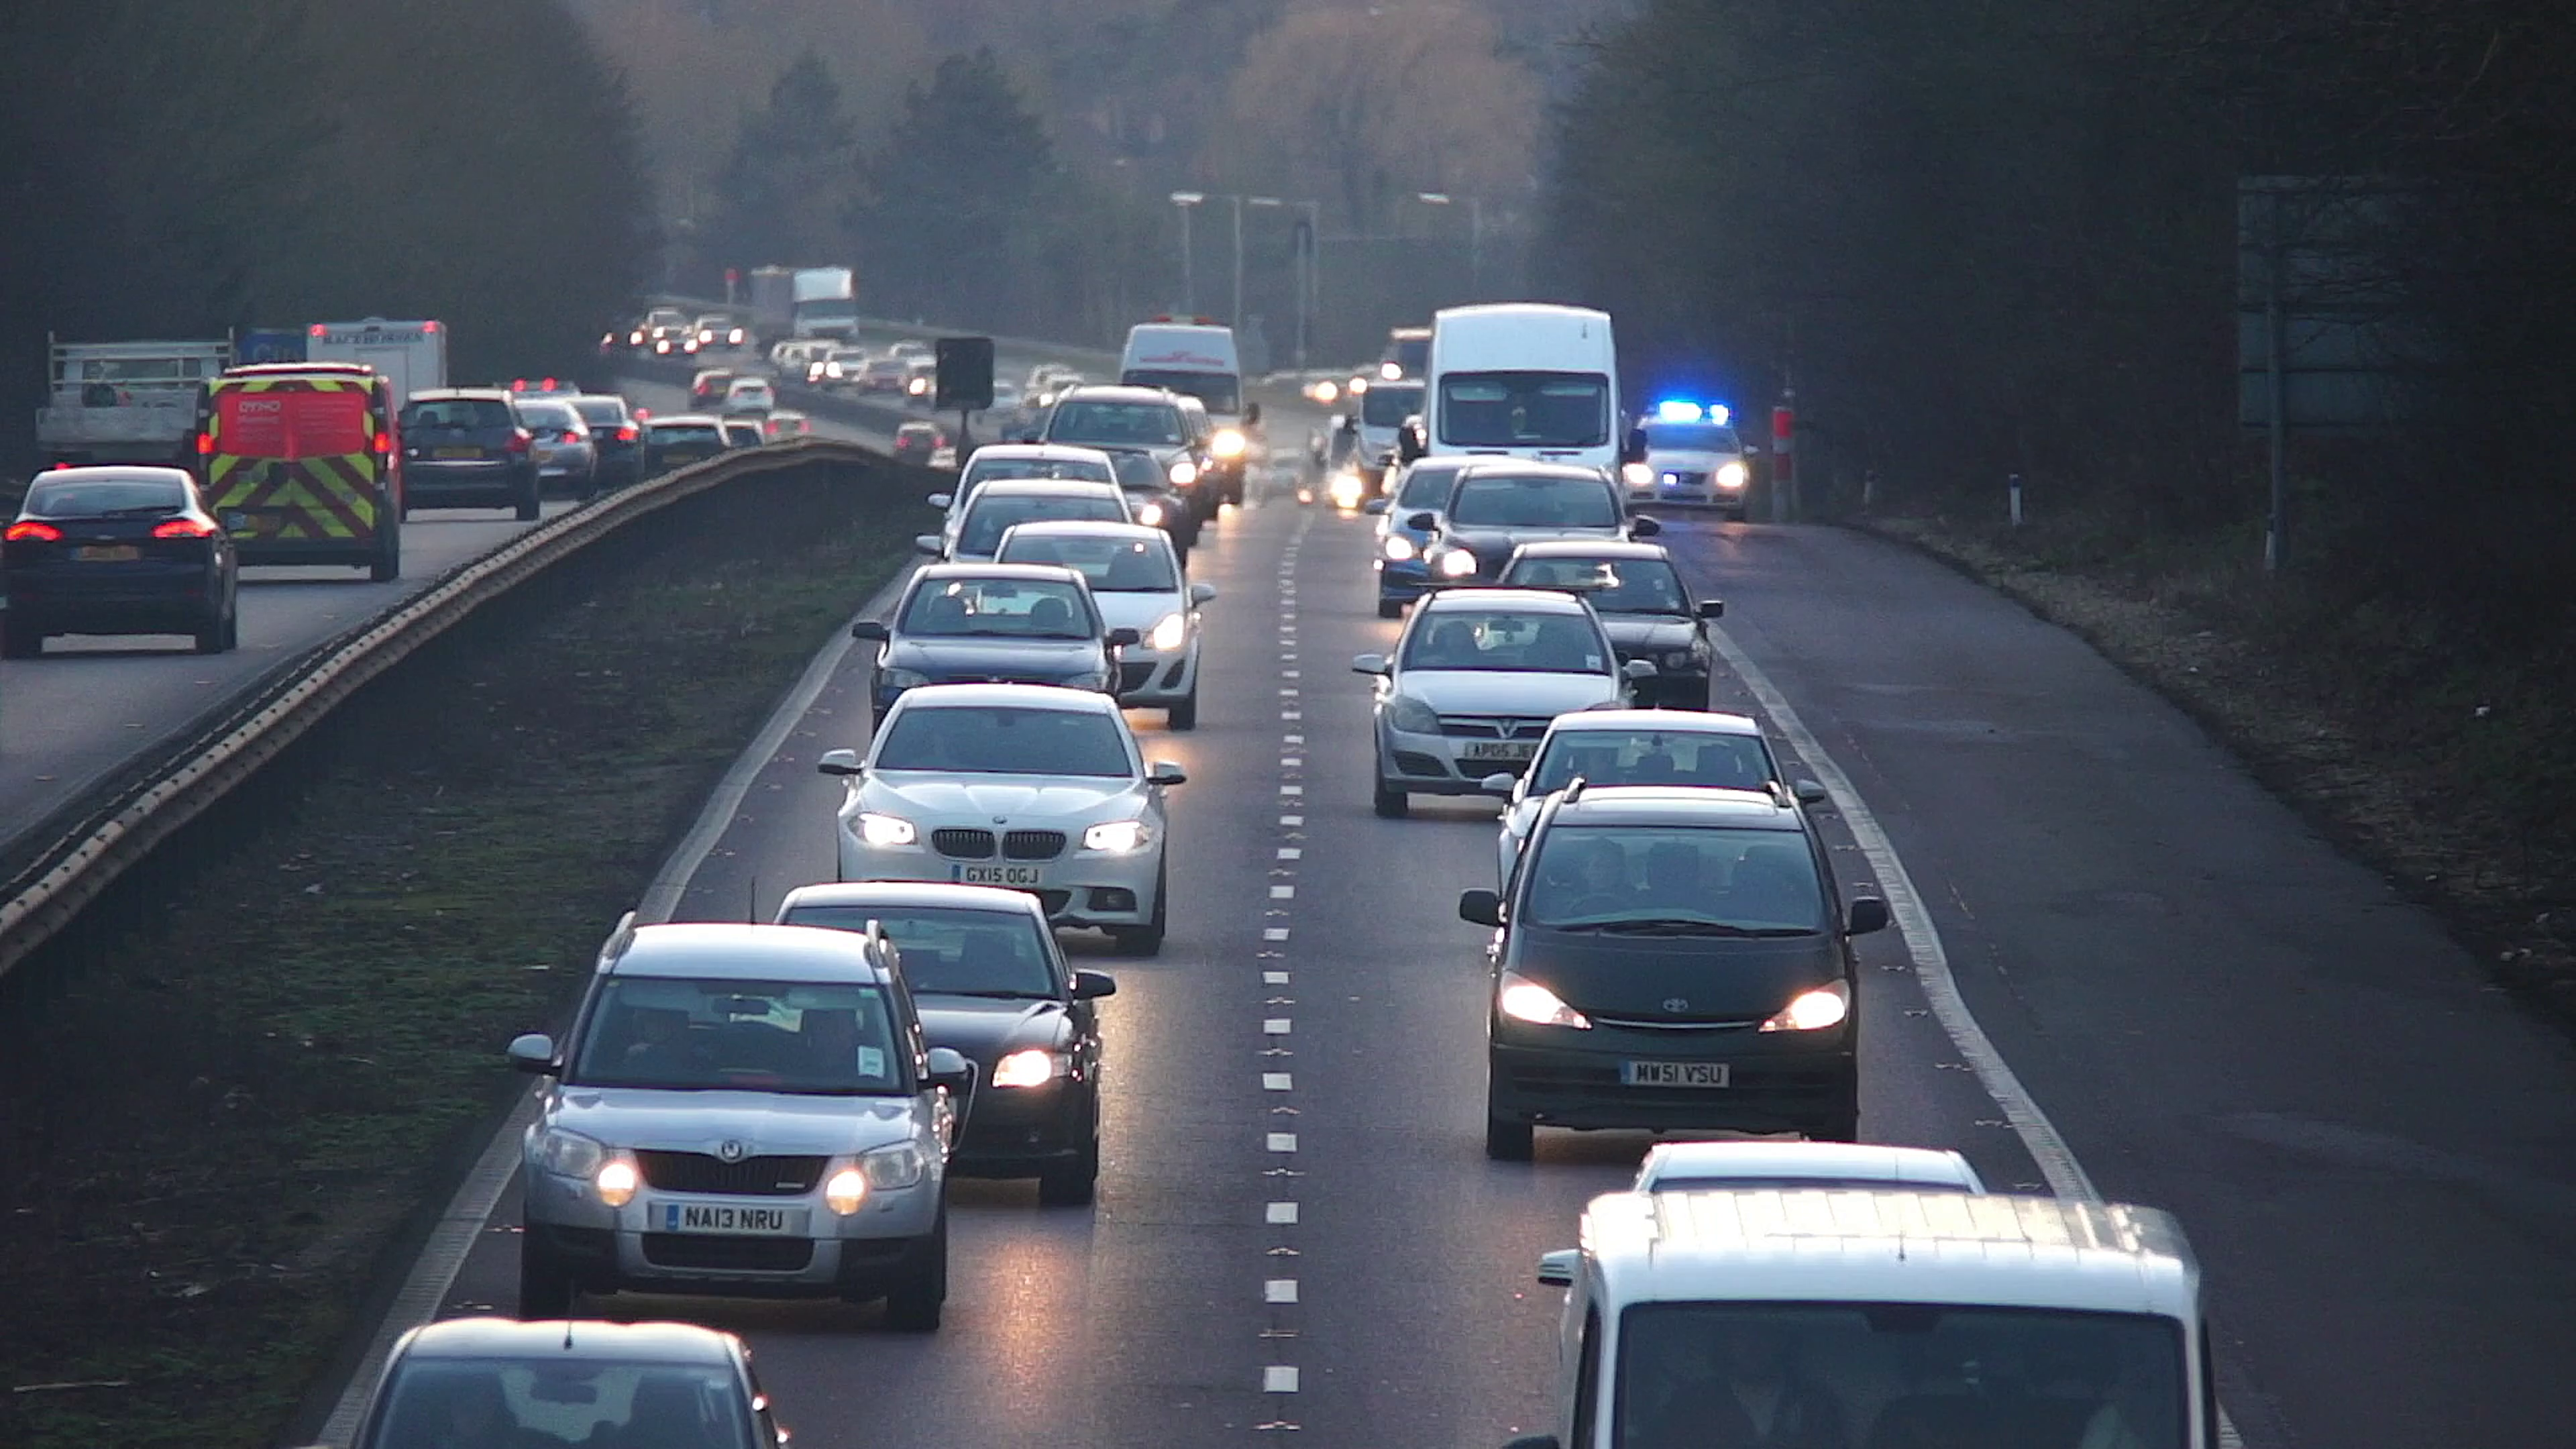

80.99923960744599
Change detected


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
video_path = '/content/webcam2.mp4'

# Initialize video capture from the video file
cap = cv2.VideoCapture(video_path)

# Check if the video file is opened correctly
if not cap.isOpened():
    print(f"Error: Could not open video '{video_path}'")
    exit()

# Initialize variables for motion detection
last_mean = 0

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Check if frame is valid
    if not ret:
        print("Error: Can't receive frame (stream end?). Exiting ...")
        break

    # Display the frame
    cv2_imshow(frame)

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Calculate the mean intensity of the current frame
    current_mean = np.mean(gray)

    # Calculate the absolute difference between the current and last mean intensity
    result = np.abs(current_mean - last_mean)
    print(result)

    # Detect motion based on the difference threshold
    if result > 1:  # You can adjust this threshold as needed
        print("Change detected")
    else:
        print("Change not detected")

    # Update the last mean intensity value
    last_mean = current_mean

    # Exit the loop when 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()
